#### **This notebook test how many targets are being targeted by replier, how many tweets from each target are being targeted**

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import datetime
import warnings
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import sys
import os

import importlib

#### packages
import helper.strategy_helper as st
import helper.visualization as viz_hp
import helper.helper as hp
import helper.file_helper as file_hp
import config.config as config_hp
import helper.pandas_helper as pd_hp
import helper.twitter_helper as twitter_hp
import helper.clean_tweet as clean_hp

[nltk_data] Downloading package stopwords to
[nltk_data]     /N/u/potem/Quartz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### **Load original data**

In [2]:
config = config_hp.config()
balanced = config['BALANCED']

balanced_neg_conversation = balanced['balanced_neg_conversation']
balanced_pos_conversation = balanced['balanced_pos_conversation']

# df_neg = pd.read_pickle(balanced_neg_conversation)
df_pos_all = pd.read_pickle(balanced_pos_conversation)

df_pos = df_pos_all.loc[df_pos_all['replier_label'] == 1]

In [3]:
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67371 entries, 41 to 2673080
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_text       67371 non-null  object 
 1   conversation_id  67371 non-null  object 
 2   replier_tweetid  67371 non-null  object 
 3   replier_userid   67371 non-null  object 
 4   poster_userid    67371 non-null  object 
 5   poster_tweetid   67371 non-null  object 
 6   tweet_time       67371 non-null  object 
 7   tweet_language   67371 non-null  object 
 8   replier_label    67371 non-null  int64  
 9   year             67371 non-null  object 
 10  campaign         67371 non-null  object 
 11  tweet_label      67371 non-null  int64  
 12  tweet_time_year  67371 non-null  object 
 13  common           0 non-null      float64
 14  id               67371 non-null  object 
 15  username         67073 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 8.7+ 

In [4]:
df_grp = (df_pos.groupby(['replier_userid',
                         'poster_userid'
                        ])['poster_tweetid']
          .nunique()
          .to_frame('count')
          .reset_index()
         )

In [5]:
print('Min ', df_grp['count'].min())
print('Max ', df_grp['count'].max())

Min  1
Max  56


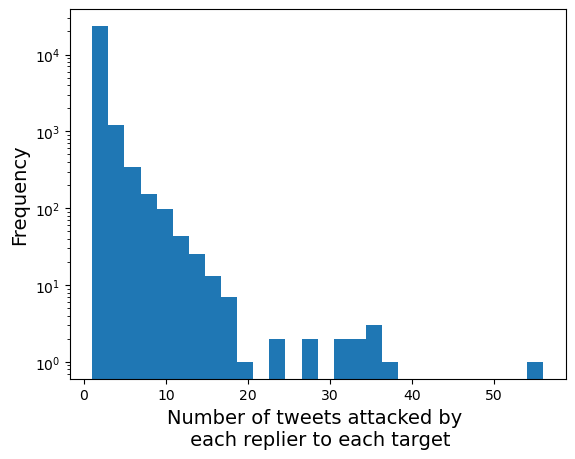

In [6]:
importlib.reload(config_hp)

config = config_hp.config()
plot_path = config['PLOTS']
reply_plot_path = plot_path['reply_plot_path']

parameters =  {
    'data': df_grp,
    'fontsize': 14,
    'columns': [
        {'column': 'count',
         'label': 'Count of Replies',
        }
    ],
    'xlabel': 'Number of tweets attacked by \n each replier to each target',
    'ylabel': 'Frequency',
    'legend_location': '',
    'log_yscale': True,
    'log_xscale': False,
    'bins': None,
    'save': {
        'path': reply_plot_path,
        'filename': 'histogram_num_tweets_attacked_by_each_replier_to_each_target.png'
    },
    'title': ''
}

viz_hp.plot_histogram(parameters)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/N/slate/potem/project/infoOps-strategy/plots/reply_characterization/CCDF_num_tweets_attacked_by_each_replier_to_each_target.png
/N/slate/potem/project/infoOps-strategy/plots/reply_characterization/CCDF_num_tweets_attacked_by_each_replier_to_each_target.png


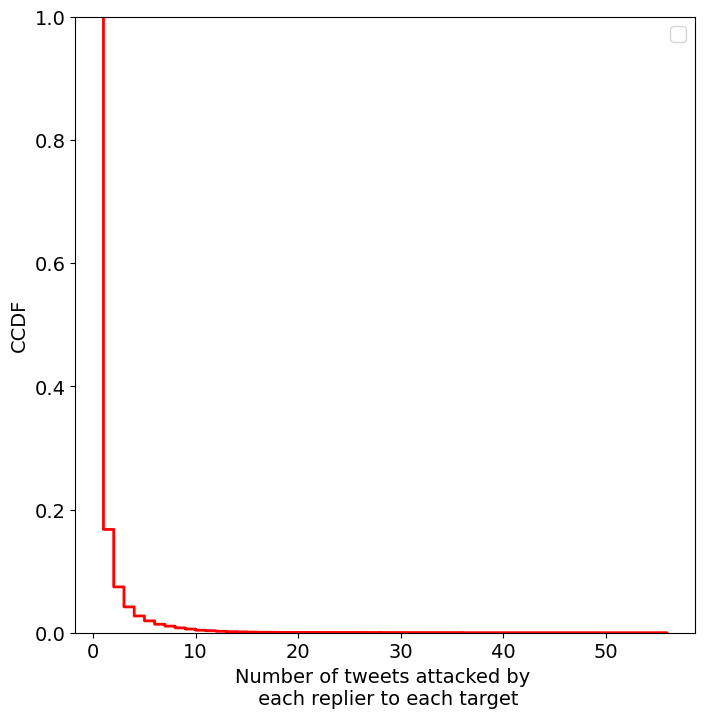

In [7]:
importlib.reload(config_hp)

config = config_hp.config()
plot_path = config['PLOTS']
reply_plot_path = plot_path['reply_plot_path']

parameters = {
        'data': [df_grp],
        'fontsize': 14,
        'complementary': True,
        'columns': [
            {'column': 'count',
             'label': '',
            },{
            'column': '',
             'label': ''
            }
        ],
        'xlabel': 'Number of tweets attacked by \n each replier to each target',
        'ylabel': 'Frequency',
        'legend_location': 'upper right',
        'log_yscale': False,
        'log_xscale': False,
        'save': {
            'path': reply_plot_path,
            'filename': 'CCDF_num_tweets_attacked_by_each_replier_to_each_target.png'
        },
        'random_color': False
}

viz_hp.ccdf(parameters)

In [ ]:
#### **Most of the IO replier attacked to only one tweet**

#### **Number of targets attacked by each replier ?**

In [8]:
df_target_count = (df_pos.groupby(['replier_userid'])
                         ['poster_userid']
          .nunique()
          .to_frame('count')
          .reset_index()
         )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/N/slate/potem/project/infoOps-strategy/plots/reply_characterization/CDF_num_targets_by_each_replier.png
/N/slate/potem/project/infoOps-strategy/plots/reply_characterization/CDF_num_targets_by_each_replier.png


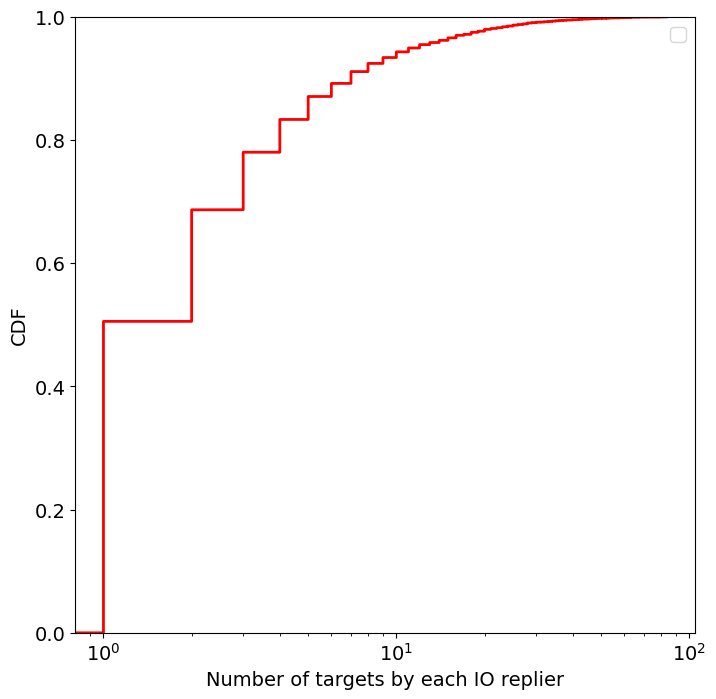

In [14]:
importlib.reload(config_hp)

config = config_hp.config()
plot_path = config['PLOTS']
reply_plot_path = plot_path['reply_plot_path']

parameters = {
        'data': [df_target_count],
        'fontsize': 14,
        'complementary': False,
        'columns': [
            {'column': 'count',
             'label': '',
            },{
            'column': '',
             'label': ''
            }
        ],
        'xlabel': 'Number of targets by each IO replier',
        'ylabel': 'CDF',
        'legend_location': 'upper right',
        'log_yscale': False,
        'log_xscale': True,
        'save': {
            'path': reply_plot_path,
            'filename': 'CDF_num_targets_by_each_replier.png'
        },
        'random_color': False
}

viz_hp.ccdf(parameters)

In [16]:
#### **50 % of the IO replier replied to one replier, other replier replied to more than 2**
#### Whats difference between one target and other targets
#### Need to look into targets itself